Processing 373 images for Color Analysis...


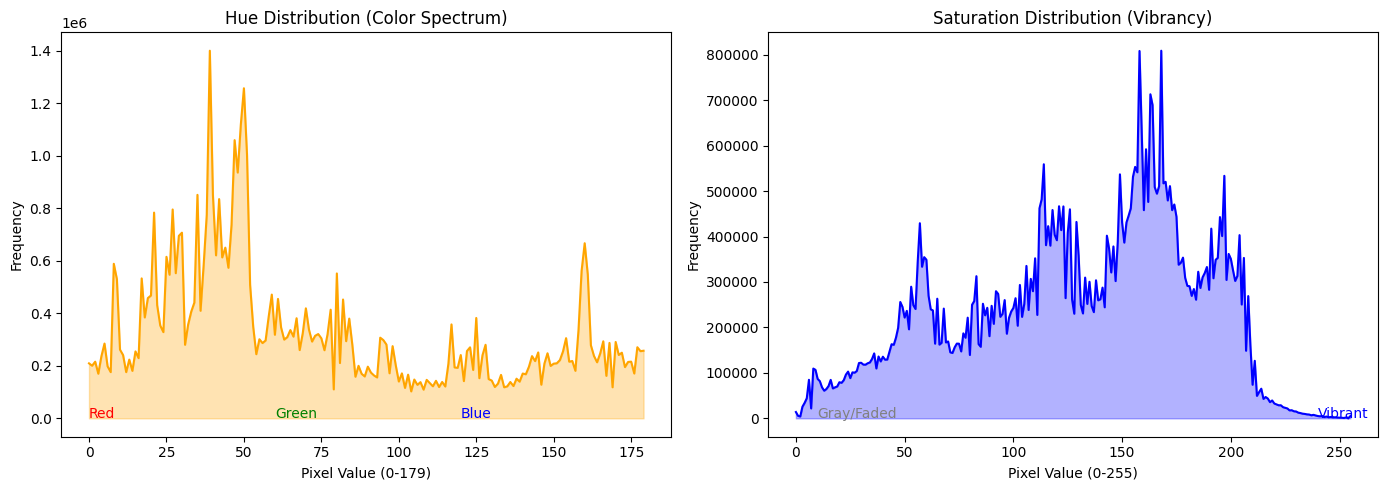

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER ="C:/Users/junha/Downloads/shape-dataset"  # <--- REPLACE THIS with your folder path
FILE_EXTENSION = "*.jpg"                # Change to *.png if needed
# =================================================


def analyze_color_distribution():
    # Get list of all images
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found! Check your path.")
        return

    # Arrays to store accumulated histograms
    hue_hist_acc = np.zeros((180, 1)) # Hue is 0-179 in OpenCV
    sat_hist_acc = np.zeros((256, 1)) # Saturation is 0-255

    print(f"Processing {len(image_paths)} images for Color Analysis...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        # Convert BGR (OpenCV default) to HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        # Calculate Histogram for Hue (Channel 0) and Saturation (Channel 1)
        hue_hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
        sat_hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])

        # Accumulate
        hue_hist_acc += hue_hist
        sat_hist_acc += sat_hist

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Hue Plot
    ax1.plot(hue_hist_acc, color='orange')
    ax1.set_title('Hue Distribution (Color Spectrum)')
    ax1.set_xlabel('Pixel Value (0-179)')
    ax1.set_ylabel('Frequency')
    ax1.fill_between(range(180), hue_hist_acc.flatten(), color='orange', alpha=0.3)
    ax1.text(0, 0, "Red", color='red')
    ax1.text(60, 0, "Green", color='green')
    ax1.text(120, 0, "Blue", color='blue')

    # Saturation Plot
    ax2.plot(sat_hist_acc, color='blue')
    ax2.set_title('Saturation Distribution (Vibrancy)')
    ax2.set_xlabel('Pixel Value (0-255)')
    ax2.set_ylabel('Frequency')
    ax2.fill_between(range(256), sat_hist_acc.flatten(), color='blue', alpha=0.3)
    ax2.text(10, 0, "Gray/Faded", color='gray')
    ax2.text(240, 0, "Vibrant", color='blue')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_color_distribution()

Processing 373 images for Brightness/Contrast...


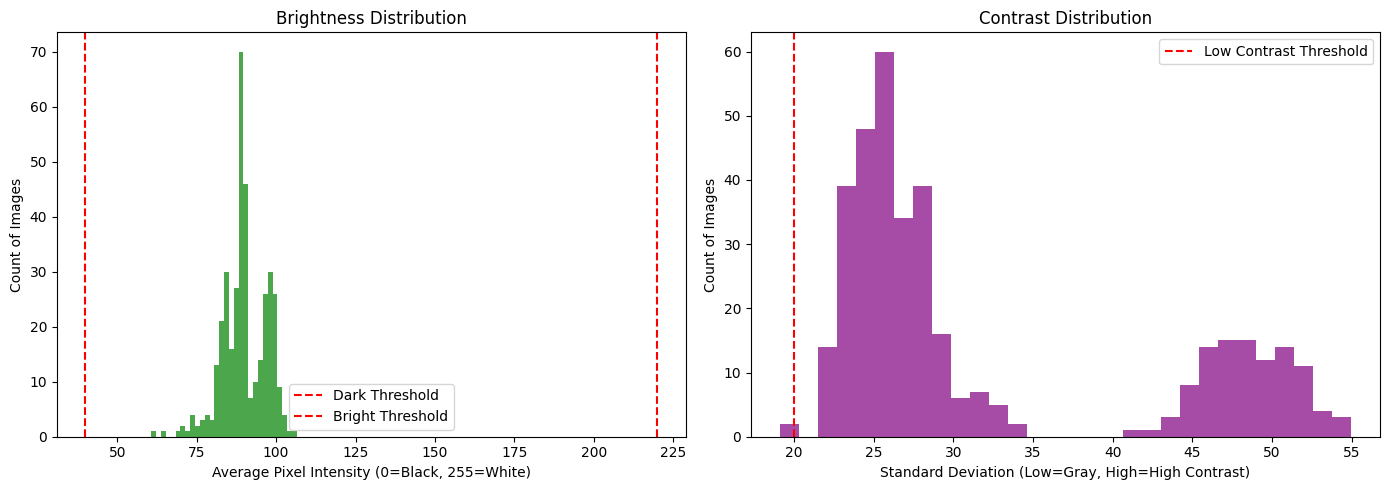


--- POTENTIAL ISSUES FOUND ---
Image: image82.jpg | Issue: Low Contrast (Washed Out) | Value: 19.10


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:/Users/junha/Downloads/shape-dataset"  # <--- REPLACE THIS
FILE_EXTENSION = "*.jpg"
# =================================================

def analyze_brightness_contrast():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found!")
        return

    brightness_values = []
    contrast_values = []
    problematic_images = []

    print(f"Processing {len(image_paths)} images for Brightness/Contrast...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        # Convert to Grayscale for simple intensity calculation
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Calculate Metrics
        mean_brightness = np.mean(gray)
        std_contrast = np.std(gray)

        brightness_values.append(mean_brightness)
        contrast_values.append(std_contrast)

        # Flag outliers (Adjust these thresholds based on your needs)
        filename = os.path.basename(path)
        if mean_brightness < 40:
            problematic_images.append((filename, "Too Dark", mean_brightness))
        elif mean_brightness > 220:
            problematic_images.append((filename, "Too Bright", mean_brightness))
        elif std_contrast < 20:
            problematic_images.append((filename, "Low Contrast (Washed Out)", std_contrast))

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Brightness
    ax1.hist(brightness_values, bins=30, color='green', alpha=0.7)
    ax1.set_title('Brightness Distribution')
    ax1.set_xlabel('Average Pixel Intensity (0=Black, 255=White)')
    ax1.set_ylabel('Count of Images')
    ax1.axvline(x=40, color='r', linestyle='--', label='Dark Threshold')
    ax1.axvline(x=220, color='r', linestyle='--', label='Bright Threshold')
    ax1.legend()

    # Contrast
    ax2.hist(contrast_values, bins=30, color='purple', alpha=0.7)
    ax2.set_title('Contrast Distribution')
    ax2.set_xlabel('Standard Deviation (Low=Gray, High=High Contrast)')
    ax2.set_ylabel('Count of Images')
    ax2.axvline(x=20, color='r', linestyle='--', label='Low Contrast Threshold')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Report Outliers
    if problematic_images:
        print("\n--- POTENTIAL ISSUES FOUND ---")
        for name, issue, val in problematic_images[:10]: # Print top 10
            print(f"Image: {name} | Issue: {issue} | Value: {val:.2f}")
    else:
        print("\nNo extreme outliers found.")

if __name__ == "__main__":
    analyze_brightness_contrast()

Processing 373 images for Blur Detection...


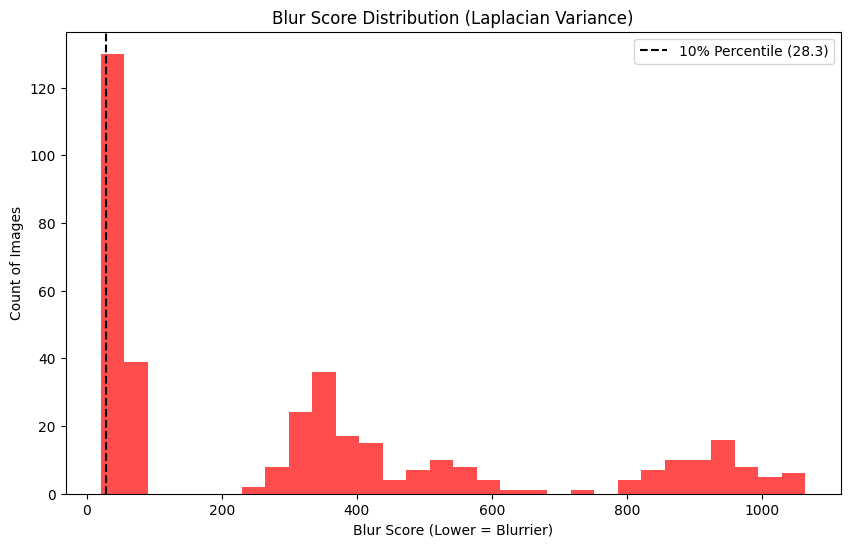


--- TOP 5 BLURRIEST IMAGES (Check these!) ---
Image: shape76.jpg | Score: 21.11
Image: shape11.jpg | Score: 21.53
Image: shape29.jpg | Score: 21.73
Image: shape36.jpg | Score: 21.74
Image: shape103.jpg | Score: 21.87

Recommended Action: Inspect images with score below 28.3


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= CONFIGURATION =================
DATASET_FOLDER = "C:/Users/junha/Downloads/shape-dataset"  # <--- REPLACE THIS
FILE_EXTENSION = "*.jpg"
# =================================================

def variance_of_laplacian(image):
    # Compute the Laplacian of the image and then return the variance
    return cv2.Laplacian(image, cv2.CV_64F).var()

def analyze_blur():
    image_paths = glob.glob(os.path.join(DATASET_FOLDER, FILE_EXTENSION))
    
    if not image_paths:
        print("No images found!")
        return

    blur_scores = []
    blurriest_images = []

    print(f"Processing {len(image_paths)} images for Blur Detection...")

    for path in image_paths:
        img = cv2.imread(path)
        if img is None: continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Calculate Blur Score
        score = variance_of_laplacian(gray)
        blur_scores.append(score)
        
        # Store for sorting later
        blurriest_images.append((score, os.path.basename(path)))

    # Sort images by blur score (lowest score = most blurry)
    blurriest_images.sort(key=lambda x: x[0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.hist(blur_scores, bins=30, color='red', alpha=0.7)
    plt.title('Blur Score Distribution (Laplacian Variance)')
    plt.xlabel('Blur Score (Lower = Blurrier)')
    plt.ylabel('Count of Images')
    
    # Calculate a dynamic threshold (e.g., lower 10% percentile)
    threshold = np.percentile(blur_scores, 10)
    plt.axvline(x=threshold, color='black', linestyle='--', label=f'10% Percentile ({threshold:.1f})')
    plt.legend()
    plt.show()

    # Report the worst offenders
    print("\n--- TOP 5 BLURRIEST IMAGES (Check these!) ---")
    for score, name in blurriest_images[:5]:
        print(f"Image: {name} | Score: {score:.2f}")

    print(f"\nRecommended Action: Inspect images with score below {threshold:.1f}")

if __name__ == "__main__":
    analyze_blur()